In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Problem Analysis 
The Covid problem is a classification problem that deals with predicting whether someone might have covid based on his or her symptoms. The columns gives us some of the symptoms. 
They include:
- cough
- fever
- sore_throat
- shortness_of_breath
- head_ache
- age_60_and_above
- gender
- test_indication

The `corona result` column gives us if someone tested positive or negative.
We will have to carry out data cleansing to rectify missing values, duplicates, wrongly formatted data, faulty data and the likes to prepare our data for training with classification models that we will later be building.

In [3]:
corona = pd.read_csv('corona_tested_individuals_ver_006.english.csv')

C:\Users\Jarib\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
corona.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [5]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [6]:
corona.shape

(278848, 10)

### Check for duplicates

In [7]:
corona.duplicated().sum()

272068

In [8]:
corona_1 = corona.drop_duplicates()

In [9]:
corona_1.duplicated().sum()

0

### Check for null values or string None

In [10]:
corona_2 = corona_1.copy()

In [11]:
corona_2.isnull().sum().sum()

0

In [12]:
for col in corona_2.columns:
    if corona_2[col].dtype=='O':
        if 'None' in corona_2[col].unique(): print(col)

cough
fever
sore_throat
shortness_of_breath
head_ache
age_60_and_above
gender


In [13]:
## These columns have None string values

In [14]:
## Let's clean them

### Let's clean the ***cough*** column

In [15]:
corona_3 = corona_2.copy()

In [16]:
corona_3.cough.unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [17]:
## get the value counts of the None values
corona_3.cough.value_counts()

1       3004
0       2531
1        622
0        571
None      52
Name: cough, dtype: int64

In [18]:
## Let's drop the None values
index = corona_3[corona_3.cough=='None'].index
corona_3 = corona_3.drop(index, axis=0)

In [19]:
corona_3.cough.unique()

array([0, 1, '0', '1'], dtype=object)

In [20]:
## Let's now convert the data type of the series to integer
corona_3.cough = corona_3.cough.astype('int')

In [21]:
corona_3.cough.dtype

dtype('int32')

In [22]:
corona_3.cough.unique()

array([0, 1])

### Let's clean the ***fever*** column

In [23]:
corona_4 = corona_3.copy()

In [24]:
corona_4.fever.unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [25]:
## get the value counts of the None values
corona_4.fever.value_counts()

0       2889
1       2644
0        678
1        515
None       2
Name: fever, dtype: int64

In [26]:
## remove none
index = corona_4[corona_4.fever=='None'].index
corona_4 = corona_4.drop(index, axis=0)

In [27]:
corona_4.fever.unique()

array([0, 1, '0', '1'], dtype=object)

In [28]:
## Let's now convert the data type of the series to integer
corona_4.fever = corona_4.fever.astype('int')

In [29]:
corona_4.cough.dtype

dtype('int32')

In [30]:
corona_4.cough.unique()

array([0, 1])

### Let's clean the ***sore_throat*** column

In [31]:
corona_5 = corona_4.copy()

In [32]:
corona_5.sore_throat.unique()

array([0, 1, '0', '1'], dtype=object)

In [33]:
## Let's convert the data type of the series to integer
corona_5.sore_throat = corona_5.sore_throat.astype('int')

In [34]:
corona_5.sore_throat.dtype

dtype('int32')

In [35]:
corona_5.sore_throat.unique()

array([0, 1])

### Let's clean the ***shortness_of_breath*** column

In [36]:
corona_6 = corona_5.copy()

In [37]:
corona_6.shortness_of_breath.unique()

array([0, 1, '0', '1'], dtype=object)

In [38]:
## Let's convert the data type of the series to integer
corona_6.shortness_of_breath = corona_6.shortness_of_breath.astype('int')

In [39]:
corona_6.shortness_of_breath.dtype

dtype('int32')

In [40]:
corona_6.shortness_of_breath.unique()

array([0, 1])

### Let's clean the ***head_ache*** column

In [41]:
corona_7 = corona_6.copy()

In [42]:
corona_7.head_ache.unique()

array([0, 1, '0', '1'], dtype=object)

In [43]:
## Let's convert the data type of the series to integer
corona_7.head_ache = corona_7.head_ache.astype('int')

In [44]:
corona_7.head_ache.dtype

dtype('int32')

In [45]:
corona_7.head_ache.unique()

array([0, 1])

In [46]:
corona_7.shape

(6726, 10)

### Let's clean the ***age_60_and_above*** column

In [47]:
corona_8 = corona_7.copy()

In [48]:
corona_8.age_60_and_above.unique()

array(['None', 'Yes', 'No'], dtype=object)

In [49]:
## get the value counts of the None values
corona_8.age_60_and_above.value_counts()

No      3620
Yes     1730
None    1376
Name: age_60_and_above, dtype: int64

In [50]:
corona_8[corona_8.age_60_and_above=='Yes'].tail(20)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
273163,2020-03-17,1,0,0,0,0,positive,Yes,None,Abroad
273184,2020-03-17,1,0,0,0,0,negative,Yes,None,Other
273195,2020-03-17,0,1,0,0,0,positive,Yes,None,Abroad
273210,2020-03-17,0,1,0,1,0,negative,Yes,None,Contact with confirmed
273213,2020-03-17,1,1,0,0,0,positive,Yes,None,Abroad
273228,2020-03-17,1,1,0,0,0,positive,Yes,None,Other
273434,2020-03-17,1,0,0,0,0,positive,Yes,None,Contact with confirmed
273692,2020-03-17,1,0,1,0,0,negative,Yes,None,Abroad
273699,2020-03-17,1,0,0,1,0,negative,Yes,None,Other
273703,2020-03-17,1,0,0,0,0,negative,Yes,None,Abroad


In [51]:
corona_8.groupby('age_60_and_above').sum()

,cough,fever,sore_throat,shortness_of_breath,head_ache
age_60_and_above,,,,,
No,1982,1712,916,712,1015
None,714,597,143,125,92
Yes,928,850,183,241,243


In [52]:
### Let's drop the age_60_and_above containing the None
index = corona_8[corona_8.age_60_and_above=='None'].index
corona_8a = corona_8.drop(index, axis=0)

In [53]:
## create another df that doesnt have the age column
corona_8b = corona_8.drop('age_60_and_above', axis=1)

In [54]:
corona_8a.age_60_and_above.unique()

array(['Yes', 'No'], dtype=object)

### Let's clean the ***corona_result*** column

#### working with df with age column

In [55]:
corona_9 = corona_8a.copy()

In [56]:
corona_9.corona_result.unique()

array(['negative', 'positive', 'other'], dtype=object)

In [57]:
# check the count value
corona_9.corona_result.value_counts()

positive    3233
negative    1666
other        451
Name: corona_result, dtype: int64

In [58]:
## drop rows with other value
index = corona_9[corona_9.corona_result=='other'].index
corona_9 = corona_9.drop(index, axis=0)

In [59]:
corona_9.corona_result.unique()

array(['negative', 'positive'], dtype=object)

#### working with df without age column

In [60]:
corona_8b.corona_result.unique()

array(['negative', 'positive', 'other'], dtype=object)

In [61]:
## drop rows with other value
index = corona_8b[corona_8b.corona_result=='other'].index
corona_8b = corona_8b.drop(index, axis=0)

In [62]:
corona_8b.corona_result.unique()

array(['negative', 'positive'], dtype=object)

In [63]:
corona_8b.shape

(6054, 9)

In [64]:
corona_9.shape

(4899, 10)

In [65]:
## corona_9 has the same rows as corona_8b with addition of one column, we'll go with these dataframe

### Let's clean the gender column

In [66]:
corona_10 = corona_9.copy()

In [67]:
corona_10.gender.unique()

array(['male', 'female', 'None'], dtype=object)

In [68]:
## check the counts for None
corona_10.gender.value_counts()

male      2094
female    2084
None       721
Name: gender, dtype: int64

In [69]:
## create 2 dataframes one to drop the gener column and the other to delete rows containing None
corona_10a = corona_10.drop('gender', axis=1)

In [70]:
index = corona_10[corona_10.gender=='None'].index
corona_10b = corona_10.drop(index, axis=0)

In [71]:
corona_10b.shape

(4178, 10)

In [72]:
corona_10a.shape

(4899, 9)

In [73]:
corona_10b.gender.unique()

array(['male', 'female'], dtype=object)

### Let's clean the ***test_indication*** column

In [74]:
corona_11b = corona_10b.copy()
corona_11a = corona_10a.copy()

In [75]:
corona_11b.test_indication.unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [76]:
corona_11a.test_indication.unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [77]:
## columns quite clean now

## Final analysis of the df

In [78]:
corona_11b.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122808,2020-04-14,1,0,0,0,0,negative,Yes,male,Other
122809,2020-04-14,1,0,0,0,0,positive,No,female,Other
122810,2020-04-14,0,0,0,0,0,negative,No,female,Other
122811,2020-04-14,0,1,0,0,0,negative,No,female,Abroad
122812,2020-04-14,1,0,0,0,0,negative,Yes,female,Other
122813,2020-04-14,0,0,0,0,0,positive,No,male,Other
122814,2020-04-14,0,0,0,0,0,negative,No,female,Abroad
122815,2020-04-14,1,0,0,0,0,positive,No,female,Contact with confirmed
122820,2020-04-14,0,0,0,0,0,negative,No,male,Other
122823,2020-04-14,1,1,1,0,0,negative,No,male,Contact with confirmed


In [79]:
corona_11b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4178 entries, 122808 to 265117
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            4178 non-null   object
 1   cough                4178 non-null   int32 
 2   fever                4178 non-null   int32 
 3   sore_throat          4178 non-null   int32 
 4   shortness_of_breath  4178 non-null   int32 
 5   head_ache            4178 non-null   int32 
 6   corona_result        4178 non-null   object
 7   age_60_and_above     4178 non-null   object
 8   gender               4178 non-null   object
 9   test_indication      4178 non-null   object
dtypes: int32(5), object(5)
memory usage: 277.4+ KB


In [80]:
corona_11b.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000
mean,0.554811,0.497367,0.228339,0.189804,0.266156
std,0.497046,0.500053,0.419812,0.392193,0.442000
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualization

#### What are the chances that someone has covid by whether they cough or not?

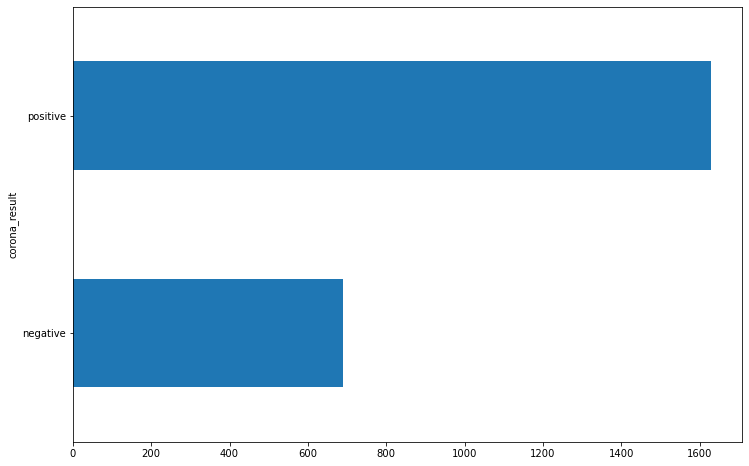

In [81]:
plt.figure(figsize=(12, 8))
corona_11b.groupby('corona_result').sum().cough.plot(kind='barh')
plt.show()

#### What are the chances that someone has covid by whether they experience shortness of breath?

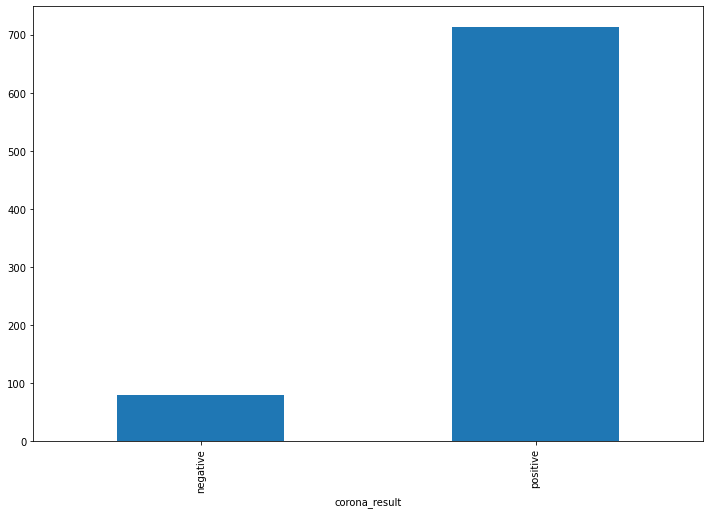

In [82]:
plt.figure(figsize=(12, 8))
corona_11b.groupby('corona_result').sum().shortness_of_breath.plot(kind='bar')
plt.show()

#### What are the chances that someone has covid by whether they have a fever?

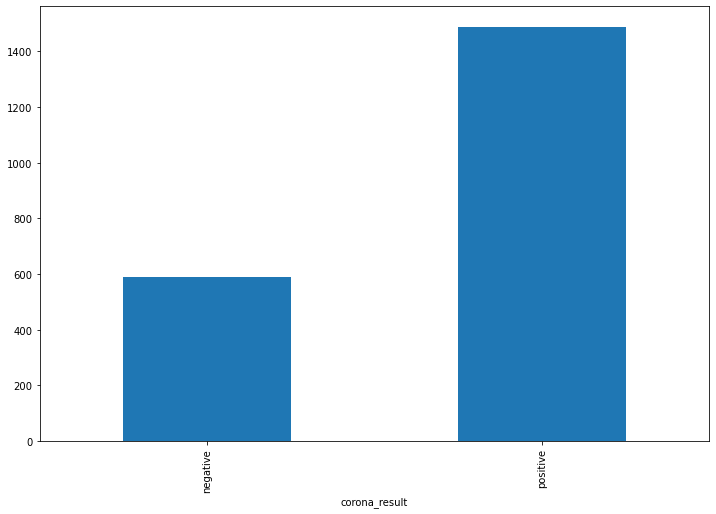

In [83]:
plt.figure(figsize=(12, 8))
corona_11b.groupby('corona_result').sum().fever.plot(kind='bar')
plt.show()

#### What are the chances that someone has covid by whether they have a sore throat?

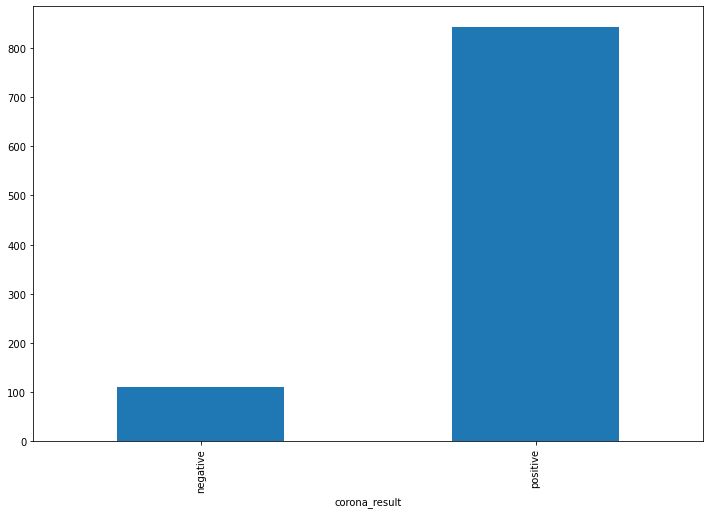

In [84]:
plt.figure(figsize=(12, 8))
corona_11b.groupby('corona_result').sum().sore_throat.plot(kind='bar')
plt.show()

#### What are the chances that someone has covid by the various characteristics?

<Figure size 864x576 with 0 Axes>

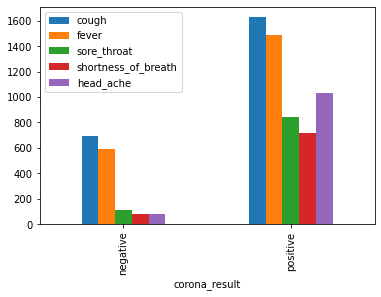

In [85]:
plt.figure(figsize=(12, 8))
corona_11b.groupby('corona_result').sum().plot(kind='bar')
plt.show()

#### What are the likelihood that someone has covid based on where he has been

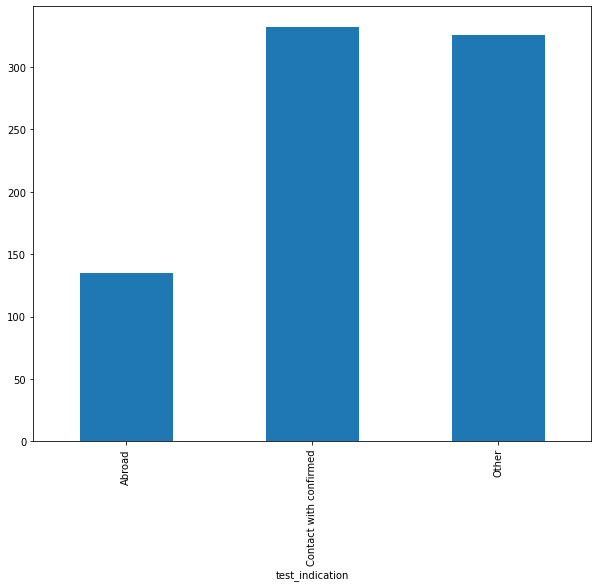

In [86]:
plt.figure(figsize=(10, 8))
corona_11b.groupby('test_indication').shortness_of_breath.sum().plot(kind='bar')
plt.show()

In [100]:
## save the dataset
corona_11b.to_csv('clean_covid.csv', sep=',', index=False, )

In [2]:
corona = pd.read_csv('clean_transformed_data.csv')

#### Showing the numbers of people with covid and without

Text(0.5, 1.0, 'Numbers of people with covid against those without')

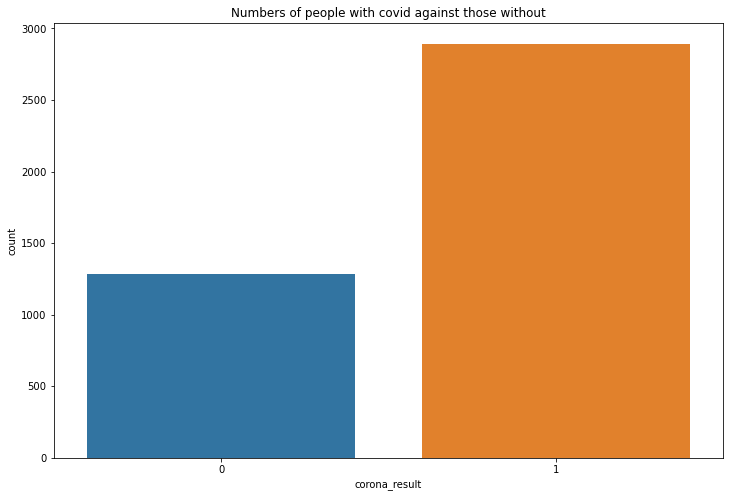

In [5]:
ax, fig = plt.subplots(figsize=(12,8))
sns.countplot(data=corona, x='corona_result')
plt.title('Numbers of people with covid against those without')

#### Showing the numbers of people with covid and without based on gender

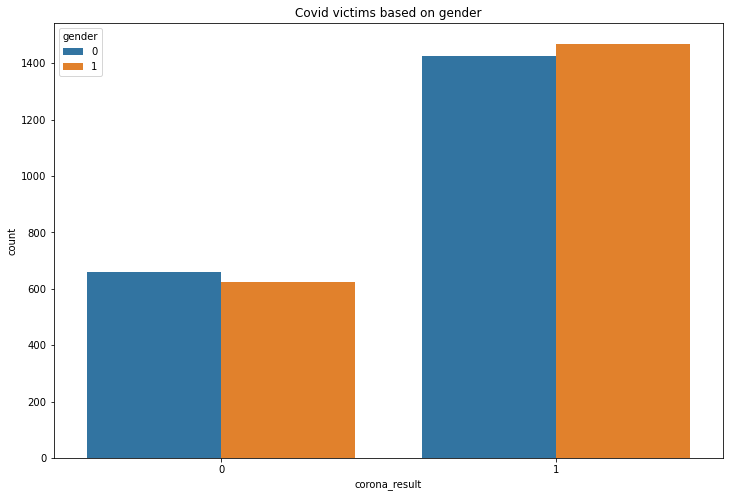

In [7]:
ax, fig = plt.subplots(figsize=(12,8))
sns.countplot(data=corona, x='corona_result', hue='gender')
plt.title('Covid victims based on gender')
plt.show()